In [1]:
import re 
import time
import json
import requests

import pandas as pd 

In [2]:
url = "https://www.zigbang.com/home/apt/map?latitude=37.505&longitude=127.05&zoom=6"
api_url = "https://apis.zigbang.com/v2/local/price?geohash=&local_level=3&period=1&transaction_type_eq=s"

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"
}

In [4]:
response = requests.get(api_url, headers)

In [5]:
data_json = json.loads(response.text) 

In [6]:
data_list = data_json['datas']

In [7]:
data_list

[{'bjdCode': '11110101',
  'local1': '서울특별시',
  'local2': '종로구',
  'local3': '청운동',
  'step': '3',
  'lat': 37.5891974379,
  'lng': 126.969329764,
  '변동률': 0.04,
  '매매평당가': 2984,
  '전월세평당가': 1745,
  '매매시세': 125414,
  '전월세시세': 73339,
  '매매최소가': 76000,
  '매매최대가': 185000,
  '전월세최소가': 49000,
  '전월세최대가': 104000,
  'apts': 2,
  'household': 186,
  'id': '11110101',
  'price': {'changeRate': {'percent': 0.04},
   'rent': {'avg': 73500, 'max': 104000, 'min': 49000, 'perArea': 1745},
   'sales': {'avg': 125000, 'max': 185000, 'min': 76000, 'perArea': 2984}},
  'name': '청운동',
  'address': '서울특별시 종로구 청운동'},
 {'bjdCode': '11110102',
  'local1': '서울특별시',
  'local2': '종로구',
  'local3': '신교동',
  'step': '3',
  'lat': 37.5844902776,
  'lng': 126.967923272,
  '변동률': None,
  'id': '11110102',
  'price': {'changeRate': {'percent': None},
   'rent': {'avg': None, 'max': None, 'min': None, 'perArea': None},
   'sales': {'avg': None, 'max': None, 'min': None, 'perArea': None}},
  'name': '신교동',
  'address':

In [8]:
df = pd.json_normalize(data_list, sep='_')

In [9]:
df

,bjdCode,local1,local2,local3,step,lat,lng,변동률,매매평당가,전월세평당가,...,address,price_changeRate_percent,price_rent_avg,price_rent_max,price_rent_min,price_rent_perArea,price_sales_avg,price_sales_max,price_sales_min,price_sales_perArea
0,11110101,서울특별시,종로구,청운동,3,37.589197,126.969330,0.04,2984.0,1745.0,...,서울특별시 종로구 청운동,0.04,73500.0,104000.0,49000.0,1745.0,125000.0,185000.0,76000.0,2984.0
1,11110102,서울특별시,종로구,신교동,3,37.584490,126.967923,NaN,NaN,NaN,...,서울특별시 종로구 신교동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11110103,서울특별시,종로구,궁정동,3,37.584683,126.973145,NaN,NaN,NaN,...,서울특별시 종로구 궁정동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11110104,서울특별시,종로구,효자동,3,37.582650,126.971932,NaN,NaN,NaN,...,서울특별시 종로구 효자동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110105,서울특별시,종로구,창성동,3,37.580545,126.972462,NaN,NaN,NaN,...,서울특별시 종로구 창성동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,52800380,전북특별자치도,부안군,백산면,3,35.703991,126.786788,NaN,NaN,NaN,...,전북특별자치도 부안군 백산면,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5062,52800390,전북특별자치도,부안군,상서면,3,35.686434,126.678045,NaN,NaN,NaN,...,전북특별자치도 부안군 상서면,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5063,52800400,전북특별자치도,부안군,하서면,3,35.715545,126.662009,NaN,NaN,NaN,...,전북특별자치도 부안군 하서면,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5064,52800410,전북특별자치도,부안군,줄포면,3,35.590342,126.677591,-0.70,850.0,642.0,...,전북특별자치도 부안군 줄포면,-0.70,19500.0,22000.0,16500.0,642.0,25500.0,29000.0,22000.0,850.0


In [10]:
cleand_df = df.dropna(subset=['변동률'])

In [11]:
cleand_df['local1'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '충청북도', '충청남도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '강원특별자치도', '전북특별자치도'], dtype=object)

In [12]:
value_counts = cleand_df['local3'].value_counts()

In [13]:
non_unique_local3 = value_counts[value_counts > 1].index

In [14]:
cleand_df.loc[cleand_df['local3'].isin(non_unique_local3), 'local3'] = cleand_df['local3'] + "(" + cleand_df['local2'] + ")"

In [15]:
cleand_df

,bjdCode,local1,local2,local3,step,lat,lng,변동률,매매평당가,전월세평당가,...,address,price_changeRate_percent,price_rent_avg,price_rent_max,price_rent_min,price_rent_perArea,price_sales_avg,price_sales_max,price_sales_min,price_sales_perArea
0,11110101,서울특별시,종로구,청운동,3,37.589197,126.969330,0.04,2984.0,1745.0,...,서울특별시 종로구 청운동,0.04,73500.0,104000.0,49000.0,1745.0,125000.0,185000.0,76000.0,2984.0
7,11110108,서울특별시,종로구,통인동,3,37.580144,126.970212,0.09,1797.0,786.0,...,서울특별시 종로구 통인동,0.09,14000.0,14000.0,14000.0,786.0,32000.0,32000.0,32000.0,1797.0
14,11110115,서울특별시,종로구,사직동(종로구),3,37.576187,126.968846,2.21,3737.0,2724.0,...,서울특별시 종로구 사직동,2.21,127000.0,153000.0,89000.0,2724.0,174000.0,204000.0,120000.0,3737.0
16,11110117,서울특별시,종로구,당주동,3,37.571572,126.974001,-0.07,2437.0,1468.0,...,서울특별시 종로구 당주동,-0.07,47500.0,77000.0,38000.0,1468.0,79000.0,89000.0,45000.0,2437.0
17,11110118,서울특별시,종로구,내수동,3,37.573308,126.971963,0.65,3813.0,2516.0,...,서울특별시 종로구 내수동,0.65,124000.0,176000.0,45500.0,2516.0,187000.0,235000.0,95000.0,3813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,52790380,전북특별자치도,고창군,대산면(고창군),3,35.341017,126.603362,2.20,310.0,163.0,...,전북특별자치도 고창군 대산면,2.20,5000.0,5000.0,5000.0,163.0,9500.0,9500.0,9500.0,310.0
5053,52800250,전북특별자치도,부안군,부안읍,3,35.729608,126.736896,-0.19,629.0,422.0,...,전북특별자치도 부안군 부안읍,-0.19,11500.0,36000.0,2200.0,422.0,17000.0,55000.0,3900.0,629.0
5059,52800360,전북특별자치도,부안군,변산면,3,35.663489,126.528463,1.47,346.0,200.0,...,전북특별자치도 부안군 변산면,1.47,4200.0,4900.0,2100.0,200.0,7300.0,10500.0,3300.0,346.0
5060,52800370,전북특별자치도,부안군,진서면,3,35.587643,126.605433,-1.04,234.0,167.0,...,전북특별자치도 부안군 진서면,-1.04,4400.0,5500.0,4000.0,167.0,6200.0,8000.0,5500.0,234.0


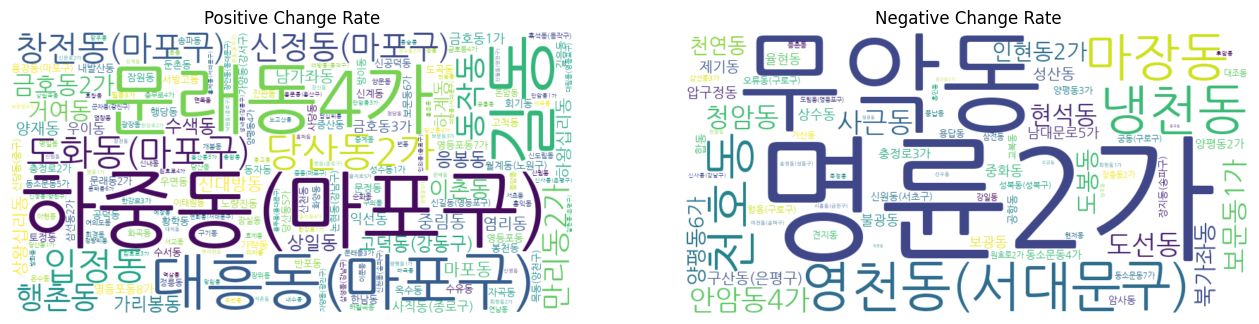

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq_positive = cleand_df[(cleand_df['local1'] == '서울특별시') & (cleand_df['변동률'] > 0)].set_index('local3')['변동률'].abs().to_dict()
word_freq_negative = cleand_df[(cleand_df['local1'] == '서울특별시') & (cleand_df['변동률'] < 0)].set_index('local3')['변동률'].abs().to_dict()

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq_positive)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq_negative)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive Change Rate')

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative Change Rate')

plt.show()

In [17]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import Dict
import nest_asyncio
import uvicorn
import pandas as pd

# Apply nest_asyncio to allow the event loop to run inside the Jupyter notebook
nest_asyncio.apply()

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello, World"}

class LocalInput(BaseModel):
    local1: str

@app.post("/word_freq/")
def get_word_freq(input: LocalInput):
    local1 = input.local1
    
    word_freq_positive = cleand_df[(cleand_df['local1'] == local1) & (cleand_df['변동률'] > 0)].set_index('local3')['변동률'].abs().to_dict()
    word_freq_negative = cleand_df[(cleand_df['local1'] == local1) & (cleand_df['변동률'] < 0)].set_index('local3')['변동률'].abs().to_dict()
    
    return {
        "word_freq_positive": word_freq_positive,
        "word_freq_negative": word_freq_negative
    }

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [78958]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:57525 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:57525 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:57526 - "POST /word_freq/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:58561 - "POST /word_freq/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:58735 - "POST /word_freq/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:59683 - "POST /word_freq/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:59950 - "POST /word_freq/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:60404 - "POST /word_freq/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [78958]


KeyboardInterrupt: 